In [ ]:
import numpy as np
def Metodo_Biseccion(a,b,f, maxIter, eps):#f continua en [a,b]?
    it=1
    p=(a+b)/2
    while(it<=maxIter and np.abs(f(p))> eps):
    
        it+=1
        if f(a)*f(p)>0:
            a=p
        else:
            b=p
        p = (a + b) / 2
    if it>maxIter:
        print(f"no converge en {maxIter}")
        
    else:
        print("Raiz=", p)
    return None        

In [ ]:
import numpy as np
def Metodo_RegulaFalsi(a,b,f, maxIter, eps):#f continua en [a,b]?
    it=1
    x=b- ((f(b)*(b-a))/(f(b)-f(a)))
    while(it<=maxIter and np.abs(f(x))> eps):
    
        it+=1
        if f(a)*f(x)>0:
            a=x
        else:
            b=x
        x=b- ((f(b)*(b-a))/(f(b)-f(a)))
    if it>maxIter:
        print(f"no converge en {maxIter}")
        
    else:
        print("Raiz=", p)
    return None        

In [ ]:
import numpy as np
def Metodo_Secante(a,b,f, maxIter, eps):#f continua en [a,b]?
    it=0
    w=a #Xn-1
    x=b #Xn
    y=2*b #Xn+1
    while(it<=maxIter and np.abs(y-x) > eps):
        y=x- (( f(x)*(x-w) )/( f(x)-f(w) ))
        w=x
        x=y
        it+=1
    if it>maxIter:
        print(f"no converge en {maxIter}")
    else:
        print("Raiz=", y)
    return None    

In [ ]:
import numpy as np
def Metodo_NR(x0,f, f_prima,maxIter, eps):#f continua en [a,b]?
    it=0
    x1=x0+2*eps
    while(it<=maxIter and np.abs(x1-x0) > eps):
        x1=x0- (f(x0)/f_prima(x0))
        x0=x1
        it+=1
    if it>maxIter:
        print(f"no converge en {maxIter}")
    else:
        print("Raiz=", x1)
    return None    

In [ ]:
import numpy as np
def Metodo_NR_Modificado(x0,f, f_prima,f_prima2,maxIter, eps):#f continua en [a,b]? metodo usadi caundo el cero de la funcion es de orden mayor a 2 y newtin puerde velocidad de convergencia
    it=0
    x1=x0+2*eps
    while(it<=maxIter and np.abs(x1-x0) > eps):
        x1=x0- (f(x0)*f_prima(x0)/((f_prima(x0)**2) - f(x0)*f_prima2(x0)))
        x0=x1
        it+=1
    if it>maxIter:
        print(f"no converge en {maxIter}")
    else:
        print("Raiz=", x1)
    return None 

In [ ]:
import numpy as np
def Metodo_PuntoFijo(x0,g,maxIter, eps):#f continua en [a,b]?
    it=0
    x1=x0+2*eps
    while(it<=maxIter and np.abs(x1-x0) > eps):
        x1=g(x0)
        x0=x1
        it+=1
    if it>maxIter:
        print(f"no converge en {maxIter}")
    else:
        print("Raiz=", x1)
    return None   

In [ ]:
import numpy as np
def Metodo_STEFFENSEN(x0,g,maxIter, eps):#f continua en [a,b]?
    it=0
    x1=x0+2*eps
    x2=0
    xs=0
    while(it<=maxIter and np.abs(x1-x0) > eps):
        x1=g(x0)
        x2=g(x1)
        xs=x0 - ((x1-x0)**2/(x2-2*x1+x0))
        x0=xs
        it+=1
    if it>maxIter:
        print(f"no converge en {maxIter}")
    else:
        print("Raiz=", x1)
    return None 

In [ ]:
def horner_con_derivada(coeficientes, x0):
    """
    Evalúa un polinomio y su derivada en x0 usando el método de Horner.
    coeficientes: lista de coeficientes desde el mayor grado al menor.
    Retorna: (p(x0), p'(x0))
    """
    n = len(coeficientes)
    y = coeficientes[0]  # P(x)
    z = coeficientes[0]  # P'(x)

    for i in range(1, n - 1):
        y = y * x0 + coeficientes[i]
        z = z * x0 + y

    y = y * x0 + coeficientes[-1]  # último término
    return y, z

In [ ]:
def Metodo_NR_Horner(x0, coef, maxIter, eps):
    """
    Método de Newton-Raphson para polinomios, usando Horner.
    coef: lista de coeficientes del polinomio (grado mayor a menor)
    """
    it = 0
    x1 = x0 + 2 * eps

    while it <= maxIter and np.abs(x1 - x0) > eps:
        fx, dfx = horner_con_derivada(coef, x0)
        x1 = x0 - fx / dfx
        x0 = x1
        it += 1

    if it > maxIter:
        print(f"No converge en {maxIter} iteraciones.")
    else:
        print("Raíz =", x1)

    return None

In [ ]:
import cmath
# ta dificil
def Metodo_Muller(f, x0, x1, x2, maxIter=100, eps=1e-6):
    """
    Método de Müller para encontrar una raíz de f con estructura similar a Newton-Raphson.
    f: función a evaluar (puede devolver valores complejos)
    x0, x1, x2: valores iniciales (reales o complejos)
    """
    it = 0
    x3 = x2 + 2 * eps  # Inicialización forzada para que entre al bucle

    while it <= maxIter and abs(x3 - x2) > eps:
        h1 = x1 - x0
        h2 = x2 - x1
        d1 = (f(x1) - f(x0)) / h1
        d2 = (f(x2) - f(x1)) / h2
        a = (d2 - d1) / (h2 + h1)
        b = a * h2 + d2
        c = f(x2)

        raiz = cmath.sqrt(b**2 - 4 * a * c)

        # Calculamos los dos posibles denominadores
        denom1 = b + raiz
        denom2 = b - raiz
        
        # Elegimos el de mayor valor absoluto (para evitar cancelación)
        if abs(denom1) > abs(denom2):
            denom = denom1
        else:
            denom = denom2
            
        if denom == 0:
            print("División por cero. El método falla.")
            return None

        dx = -2 * c / denom
        x3 = x2 + dx

        # Actualizamos para la siguiente iteración
        x0, x1, x2 = x1, x2, x3
        it += 1

    if it > maxIter:
        print(f"No converge en {maxIter} iteraciones.")
    else:
        print(f"Raíz = {x3}")

    return None


1)Metodo de matrices



In [160]:
def metodo_gaus(A, B, n):
    """
    Realiza la triangulación de Gauss sobre A, y devuelve la solución del sistema.
    A: matriz de coeficientes (modificada en el proceso)
    B: vector de términos independientes
    n: dimensión del sistema
    """

    
    for k in range(0, n): 

        for i in range(k + 1, n): 
            A[i,k]/= A[k,k]  

            for j in range(k + 1, n):  
                A[i,j] -=  A[i,k]* A[k,j]  
            
    return Sustitucion(A, B, n)


def Sustitucion(A, B, n):
    """
    Realiza dos fases:
    1. Sustitución hacia adelante para resolver Ly = b
    2. Sustitución hacia atrás para resolver Ux = y
    """

    x = [0] * n  
    
    x[0] = B[0] / A[0,0] 

    for i in range(1, n):  
        suma = 0
        
        for j in range(0, i):  
            suma += A[i,j] * x[j]
            
        x[i] = B[i] - suma  
        


    

    
    x[n - 1] /=  A[n - 1,n - 1]  

    for i in range(n - 2, -1, -1):  
        suma = 0
        
        for j in range(i + 1, n):  
            suma += A[i,j] * x[j]

        x[i] = (x[i] - suma) / A[i,i] 
       
    return x

In [161]:
def triangulacionParcial(A, b, n):
    for k in range(n):

        
        # Pivoteo parcial por columna
        max_row = k + np.argmax(np.abs(A[k:n, k]))
        

        
        # Intercambio de filas en A y b
        A[k], A[max_row] = A[max_row], A[k]
        b[k], b[max_row] = b[max_row], b[k]


        

        #igual que en triangulacion simple
        for i in range(k + 1, n):
            A[i][k] /= A[k][k]
            for j in range(k + 1, n):
                A[i][j] -= A[i][k] * A[k][j]



    
    return Sustitucion(A, b, n)

In [162]:
def triangulacionParcialEscalada(A, b, n): #mejor metodo
    s=np.max(np.abs(A), axis=1)  # factores de escala

    for k in range(n):
        # Buscar el índice con el mayor cociente relativo, de aca para 
        max_ratio = -1
        max_row = k
        
        for i in range(k, n):
            
           
                
            ratio = abs(A[i][k]) / s[i]
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_row = i

        # Intercambio de filas 
        A[k], A[max_row] = A[max_row], A[k]
        b[k], b[max_row] = b[max_row], b[k]
        s[k], s[max_row] = s[max_row], s[k]
        #para aca se agrega nueva cosas

        
        
        #igual que en triangulacion simple
        for i in range(k + 1, n):
            A[i][k] /= A[k][k]
            for j in range(k + 1, n):
                A[i][j] -= A[i][k] * A[k][j]

    return Sustitucion(A, b, n)

In [163]:
A =np.array( [
    [2, -1, -1],
    [0,  2,  1],
    [-1, 1, 0.5]
])
A6 =np.array( [
    [2, -1, -1],
    [0,  2,  1],
    [-1, 1, 0.5]
])

A7 =np.array( [
    [2, -1, -1],
    [0,  2,  1],
    [-1, 1, 0.5]
])



# Vector b
b5 = np.array([0, 3, 0.5])
b6= np.array([0, 3, 0.5])
b7 = np.array([0, 3, 0.5])

# Tamaño
n = len(A)

print(metodo_gaus(A,b5,n))
print(triangulacionParcial(A6,b6,n))
print(triangulacionParcialEscalada(A7,b7,n))

[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]


In [164]:
import numpy as np

def metodo_Cholensky(A):
    n = len(A)
    L = np.zeros_like(A)

    for i in range(n):
        for j in range(i + 1):
            suma = 0
            for k in range(j):
                suma += L[i, k] * L[j, k]

            if i == j:
                L[i, j] = (A[i, i] - suma) ** 0.5
            else:
                L[i, j] = (A[i, j] - suma) / L[j, j]
    """#opcional
    C= np.zeros_like(A)
    for i in range(0, n):
        for j in range(0, n):
            if i != j:
                C[i, j] += L[i, j] + L.T[i, j]
            else:
                C[i, j] = L[i, j]
    return C
    """
    return L

In [150]:
import numpy as np

A1 = np.array([[6, 2, 1, 1],
              [2, 4, 1, 0],
              [1, 1, 4, -1],
              [1, 0, -1, 1]], dtype=float)

L = metodo_Cholensky(A1)



print("Matriz L:\n", L)
print(f"l11 = {L[0,0]:.4f}")
print(f"l22 = {L[1,1]:.4f}")
print(f"l32 = {L[2,1]:.4f}")
print(f"l41 = {L[3,0]:.4f}")


Matriz L:
 [[ 2.44948974  0.          0.          0.        ]
 [ 0.81649658  1.82574186  0.          0.        ]
 [ 0.40824829  0.36514837  1.92353841  0.        ]
 [ 0.40824829 -0.18257419 -0.57186277  0.68773031]]
l11 = 2.4495
l22 = 1.8257
l32 = 0.3651
l41 = 0.4082


In [151]:
A1 = np.array([[4, 12, -16],
              [12, 37, -43],
              [-16, -43, 98]], dtype=float)

b = np.array([1, 2, 3], dtype=float)

L1 = metodo_Cholensky(A1)
x=Sustitucion(A1,b,len(A1))
print(x)

[-0.045056536127964675, -0.45394373965802537, -0.3673469387755102]


In [ ]:
#nuevo
def MatrizDiagonalmenteDominante(A):
    n=len(A)
    for i in range(n):
        suma=0
        
        for j in range(n)
            if(i!=j):
                suma+=np.abs(A[i,j])
                
        if(np.abs(A[i,i])<suma):        
            return False
            
    return True

def MatrizSimetrica(A):
    n=len(A)
    for i in range(n):
        for j in range(n):
            if A[i,j]!=A[j,i]:
                return False

    return True


def MatrizDefinidaPositiva(A, tolerancia):
    # Calcula los autovalores
    Autovalores = np.linalg.eigvals(A)
    # Devuelve True si todos los autovalores son > 0
    return np.all(Autovalores > tolerancia)

In [5]:
import numpy as np

def jacobi(A, b, max_iter, eps=10**-5):
    #mido la longuitud de la matriz y creo 2 una nueva y vieja
    n = len(A)
    x_old = np.zeros(n)
    x_new = np.zeros(n)
    if(MatrizDiagonalmenteDominante(A)==True):
        for k in range(1, max_iter + 1):
            
            for i in range(n):
                
                suma = 0.0
                
                for j in range(n):
                    
                    if j != i: 
                        suma += A[i][j] * x_old[j]
                        
                x_new[i] = (b[i] - suma) / A[i][i]
    
            
            error = np.linalg.norm(x_new - x_old, ord=np.inf)
           
            print(f"Iteración {k}: error = {error:.6f}")
    
            if error < eps:
                return x_new
                
            x_old[:] = x_new
    
        return x_new
    else:
        print("No es diagonalmente dominante")
        return None

In [15]:

def GaussSeidel(A, b, max_iter, eps=10**-5):
    n = len(b)
    x_old = np.zeros(n)
    x_new = np.zeros(n)
    if(MatrizDiagonalmenteDominante(A)==True and MatrizSimetrica(A)==True and MatrizDefinidaPositiva(A,1e-8) ==True)
        for k in range(max_iter):
            for i in range(n):
                suma = 0.0
            
                
                for j in range(i):
                    suma += A[i, j] * x_new[j]
            
            
                for j in range(i + 1, n):
                    suma += A[i, j] * x_old[j]
            
                x_new[i] = (b[i] - suma) / A[i, i]
                
            error = np.linalg.norm(x_new - x_old, ord=np.inf)  # Norma infinito (error máximo)
    
            
    
            if error < eps:
                print(f"Iteración {k}: error = {error:.6f}")
                return x_new
                
                
            x_old[:] = x_new  # Copia sin crear nueva lista
    
        return x_new
    else:
        print("La matriz no cumple con alguna de las 3 condiciones de ser diagonalmnete dominante, simetrica y/o definida positiva")
        return None

In [111]:
def SOR(A, b, max_iter, eps, omega):
    n = len(A)
    x_old = [0.0] * n
    x_new = [0.0] * n

    for k in range(1, max_iter + 1):
        for i in range(n):
            suma = 0.0

            
            for j in range(i):
                suma += A[i][j] * x_new[j]

            
            for j in range(i+1, n):
                suma += A[i][j] * x_old[j]

            
            x_i_old = x_old[i]
            x_new[i] = (1 - omega) * x_i_old + (omega * (b[i] - suma)) / A[i][i]

        error = max(abs(x_new[i] - x_old[i]) for i in range(n))
        print(f"Iteración {k}: error = {error:.6f}")

        if error < eps:
            return x_new

        x_old = x_new[:]

    return x_new

In [16]:
import numpy as np
Aa=np.array([[5,-2,0],[2,5,-1],[2,-1,-4]], dtype=float)
bb=np.array([2,3,4], dtype=float)

resultado=GaussSeidel(Aa, bb, 40 )

print(resultado)
resultado2=jacobi(A, b, 40 )
print(resultado2)

Iteración 11: error = 0.000004
[ 0.49572755  0.23931536 -0.81196506]
Iteración 1: error = 1.000000
Iteración 2: error = 0.360000
Iteración 3: error = 0.210000
Iteración 4: error = 0.099600
Iteración 5: error = 0.042100
Iteración 6: error = 0.024356
Iteración 7: error = 0.009742
Iteración 8: error = 0.005675
Iteración 9: error = 0.002104
Iteración 10: error = 0.001465
Iteración 11: error = 0.000557
Iteración 12: error = 0.000334
Iteración 13: error = 0.000156
Iteración 14: error = 0.000067
Iteración 15: error = 0.000038
Iteración 16: error = 0.000015
Iteración 17: error = 0.000009
[ 0.49572854  0.23931302 -0.81196511]


observacion: gauss seidel demora 6 iteraciones menos que jacobi para llegar al mismo orden de error porque lo que seidel es mas rapido que jacobi ya que...

In [135]:
A2=np.array([[2,-1, 0],
            [1, 6, -2],
            [4, -3, 8]], dtype=float)
b = np.array([2, -4, 5], dtype=float)

print("resultado",jacobi(A2, b, 100 ,1e-100))
print("resultado",GaussSeidel(A2, b, 100 ,1e-100))

Iteración 1: error = 1.000000
Iteración 2: error = 0.750000
Iteración 3: error = 0.194444
Iteración 4: error = 0.097222
Iteración 5: error = 0.070095
Iteración 6: error = 0.018663
Iteración 7: error = 0.009865
Iteración 8: error = 0.006619
Iteración 9: error = 0.001966
Iteración 10: error = 0.001098
Iteración 11: error = 0.000634
Iteración 12: error = 0.000210
Iteración 13: error = 0.000118
Iteración 14: error = 0.000062
Iteración 15: error = 0.000022
Iteración 16: error = 0.000012
Iteración 17: error = 0.000006
Iteración 18: error = 0.000002
Iteración 19: error = 0.000001
Iteración 20: error = 0.000001
Iteración 21: error = 0.000000
Iteración 22: error = 0.000000
Iteración 23: error = 0.000000
Iteración 24: error = 0.000000
Iteración 25: error = 0.000000
Iteración 26: error = 0.000000
Iteración 27: error = 0.000000
Iteración 28: error = 0.000000
Iteración 29: error = 0.000000
Iteración 30: error = 0.000000
Iteración 31: error = 0.000000
Iteración 32: error = 0.000000
Iteración 33: err

In [ ]:
#nuevo
def lagrange(dato, x):
    resultado = 0
    n = len(dato)

    for i in range(n):
        mult = 1
        for j in range(n):
            if j != i:
                mult *= (x - dato[j][0]) / (dato[i][0] - dato[j][0])
        resultado += dato[i][1] * mult

    return resultado

In [84]:
def DifDiv(x,d,n):
    for i in range(0,n):
        for j in range(n-1,i-1,-1):
            d[j]=(d[j]-d[j-1])/(x[j]-x[j-i])
    return d
    

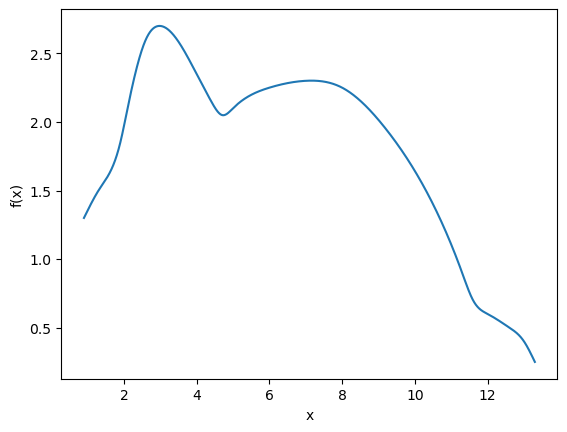

"\nLa función CubicSpline(x, y, bc_type='natural') crea una interpolación suave entre los puntos dados usando polinomios cúbicos por tramos. Es parte de scipy.interpolate.\n\n🔹 Parámetros de entrada:\nx: array con los valores del eje independiente (ordenados).\n\ny: array con los valores del eje dependiente (función evaluada en cada x).\n\nbc_type: define las condiciones de frontera.\n\n'natural' (por defecto): la segunda derivada es cero en los extremos.\n\n'clamped': se dan derivadas en los extremos.\n\n🔹 Resultado:\nDevuelve un objeto tipo función, que:\n\nPodés usar como spline(valor) para obtener f(valor).\n\nTambién podés evaluar derivadas: spline(valor, nu=1) para la primera derivada, nu=2 para la segunda, etc.\n"

In [6]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0,
              8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1,
              2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])
spline = CubicSpline(x, y,bc_type='natural')
x_fino = np.linspace(min(x), max(x), 500)
y_fino = spline(x_fino)


plt.plot(x_fino, y_fino, '-', label='Spline cúbico')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()
"""
La función CubicSpline(x, y, bc_type='natural') crea una interpolación suave entre los puntos dados usando polinomios cúbicos por tramos. Es parte de scipy.interpolate.

🔹 Parámetros de entrada:
x: array con los valores del eje independiente (ordenados).

y: array con los valores del eje dependiente (función evaluada en cada x).

bc_type: define las condiciones de frontera.

'natural' (por defecto): la segunda derivada es cero en los extremos.

'clamped': se dan derivadas en los extremos.

🔹 Resultado:
Devuelve un objeto tipo función, que:

Podés usar como spline(valor) para obtener f(valor).

También podés evaluar derivadas: spline(valor, nu=1) para la primera derivada, nu=2 para la segunda, etc.
"""


In [ ]:
def trapecio(f,a,b):
    return (b-a)*(f(a)+f(b))/2

def rectangulo(f,a,b):
    return (b-a)*f(a)

def simpson(f,a,b):
    c=(b+a)/2
    return (b-a)*(f(a)+4f(c)+f(b))/6


def Trapecio_Compuesto(f,a,b,x):
    h=(b-a)/(len(x)-1)
    suma=f(x[0])

    n=len(x)
    for i in range(1, n-1):
    
        suma+=2*f(x[i])
    
    suma+=f(x[n-1])
    return (h/2)*suma

def Simpson_Compuesto(f,a,b,x):

    n=len(x)
    h=(b-a)/(n-1)
    suma=f(x[0])

    
    for i in range(1, n-1):
        if(i%2==0):
            suma+=2*f(x[i])
        else:
            suma+=4*f(x[i])
            
    suma+=f(x[n-1])
    return (h/3)*suma

In [ ]:
#nuevo medio medio
import numpy as np

def romberg(f, a, b, eps=1e-6, max_iter=10):
    R = np.zeros((max_iter, max_iter))  # Matriz para almacenar los valores
    
    # Primer cálculo con un solo trapecio
    h = b - a
    R[0, 0] = (h / 2) * (f(a) + f(b))
    
    for k in range(1, max_iter):
        h /= 2  # Reducir el paso a la mitad
        
        # Sumar los valores de f en los puntos nuevos (los puntos medios)
        suma = 0
        num_puntos = 2**(k-1)  # Número de puntos nuevos
        for i in range(1, num_puntos + 1):
            x = a + (2 * i - 1) * h
            suma += f(x)
        
        # Calcular trapecio refinado
        R[k, 0] = 0.5 * R[k-1, 0] + h * suma
        
        # Extrapolación de Richardson para mejorar la aproximación
        for j in range(1, k + 1):
            R[k, j] = (4**j * R[k, j-1] - R[k-1, j-1]) / (4**j - 1)
        
        # Si la diferencia entre las dos últimas estimaciones es menor que eps, parar
        if abs(R[k, k] - R[k-1, k-1]) < eps:
            return R[k, k]
    
    # Si no convergió, devolver la última estimación y avisar
    print("No convergió después de", max_iter, "iteraciones")
    return R[max_iter-1, max_iter-1]


In [ ]:
#nuevo conocerse nodos y puntos
def CuadraturaDeGauss(f,a,b coef, nodos):
    suma=0
    n=len(nodos)
    
    for i in range (n):
        x = (b - a) / 2 * nodos[i] + (b + a) / 2
        suma += coef[i] * f(x)
    return ((b-a)/2)* suma